# Lab 4 - BCC406

## REDES NEURAIS E APRENDIZAGEM EM PROFUNDIDADE

## Convolução e CNN

### Prof. Eduardo e Prof. Pedro

Objetivos:

- Aplicação de filtros em imagens por meio de convolução
- Modelagem de uma rede de convolução para o problema de classificação de gatos/não gatos.
- Notebook baseado em tensorflow e Keras.

Data da entrega : 11/02

- Complete o código (marcado com ToDo) e quando requisitado, escreva textos diretamente nos notebooks. Onde tiver *None*, substitua pelo seu código.
- Execute todo notebook e salve tudo em um PDF **nomeado** como "NomeSobrenome-LabX.pdf"
- Envie o PDF via google [FORM](https://forms.gle/tLfswSMCMaQxmm9Y6)


# Aplicando filtros e entendendo padding, stride e pooling (30pt)

A primeira etapa é importar os pacotes e montar o drive

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras import datasets, layers, models
import os
import skimage
from skimage import io
from skimage.io import imread
from skimage.transform import resize
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Além dos passos anteriores, também iremos carregar uma imagem no disco para usá-la como exemplo para as próximas funções. (Imagem disponível na pasta de *Datasets* da disciplina)

sample image shape:  (512, 512, 3)


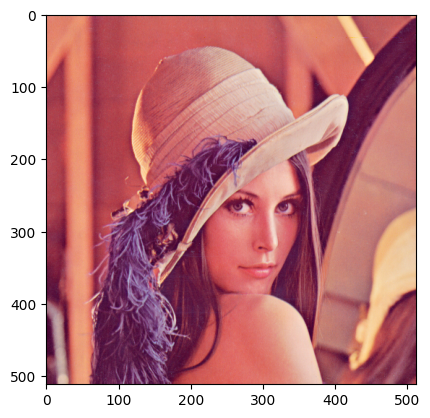

In [ ]:
sample_image = imread("/content/drive/MyDrive/Praticas redes neurais/Lenna.png")
sample_image= sample_image.astype(float)

size = sample_image.shape
print("sample image shape: ", sample_image.shape)

plt.imshow(sample_image.astype('uint8'));

Veja o shape da imagem:

In [ ]:
sample_image.shape

(512, 512, 3)

## Criando e aplicando um filtro com convolução (10pt)

Utilize o `TF/Keras` para aplicar o filtro. Observe que nesta etapa não há necessidade de treinamento algum. O código abaixo cria 3 filtros de tamanho $5\times5$, e adiciona *padding* de forma a manter a imagem de saída (filtrada) do mesmo tamanho da imagem de entrada (`padding ="same"`).

O objetivo do código abaixo é criar um objeto sequencial com apenas uma camada de convolução do tipo `tf.keras.layers.Conv2D`.

In [ ]:
conv = Sequential([
    Conv2D(filters=3, kernel_size=(5, 5), padding="same",
           input_shape=(None, None, 3))
])
conv.output_shape

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


(None, None, None, 3)

In [ ]:
conv.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, None, None, 3)       │             228 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 228 (912.00 B)

 Trainable params: 228 (912.00 B)

 Non-trainable params: 0 (0.00 B)

Quando usamos `TF/kertas`, as convoluções esperam vetores no formato : `(batch_size, dim1, dim2, dim3)`. Ou seja, a primeria posição é o tamanho do lote.

Uma imagem isolada é considerada um lote de tamanho 1, portanto, deve-se expandir mais uma dimenão do tensor.

In [ ]:
img_in = np.expand_dims(sample_image, 0)
img_in.shape

(1, 512, 512, 3)

Agora, pode-se aplicar a convolução. Aplique a convolução na imagem de exemplo (expandida) e verifique o tamanho da imagem resultante (`img_out`). Use a função `predict` do objeto `conv` para aplicar a convolução.

In [ ]:
img_out = conv(img_in)
img_out.shape

TensorShape([1, 512, 512, 3])

Plote as imagens lado a lado e observe o resultado. O parâmetro "same" no padding aplica um padding automático no sentido de garantir que a saída tenha o mesmo tamanho da entrada.
Lembre-se que o padding adiciona zeros nas bordas da imagem, antes da aplicação da convolução.

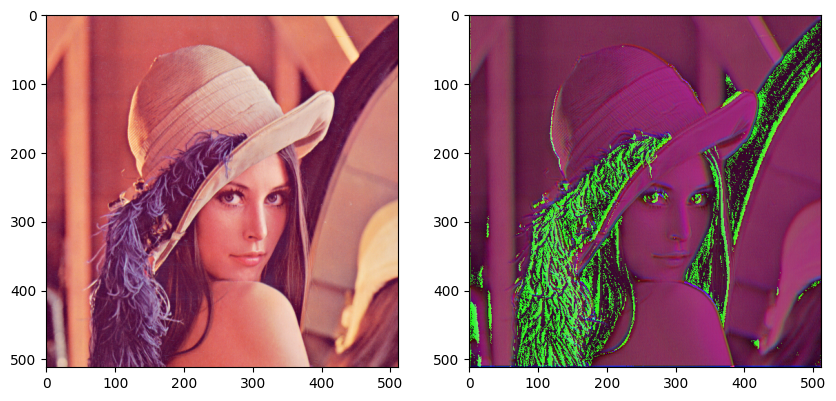

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
ax1.imshow(img_out[0].numpy().astype('uint8'));

Agora, crie **um** único filtro de tamanho $5\times5$, e adicione *padding* oposto ao anterior (`valid` ao invés de `same`).

In [ ]:
conv2 = Sequential([
    Conv2D(filters=1, kernel_size=(5, 5), padding="valid",
           input_shape=(None, None, 3))
])
conv2.output_shape

(None, None, None, 1)

Um filtro $5\times5\times3$ tem a profundidade do filtro de acordo com a entrada, ou seja, tem-se $5 \times 5 \times 3 = 75$ valores que serão convoluídos pela imagem. Detalhe importante: **não se esqueça do bias! **.

In [ ]:
conv2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, None, None, 1)       │              76 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 76 (304.00 B)

 Trainable params: 76 (304.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
img_out = conv2(img_in)
img_out[0].shape

TensorShape([508, 508, 1])

**ToDo:** O que você observou no shape após a troca no conteúdo do *padding*?

```
Ao aplicar o padding como valid, o algoritmo realizou a convolução somente com os pixéis originais, gerando então uma saída menor do que a original
```

Como tivemos que expandir a primeira dimensao para aplicar a convolução, podemos remover a dimensão unitária para plotar a imagem, usando a função `squeeze()`

In [ ]:
i = img_out[0].numpy().squeeze()
i.shape

(508, 508)

Agora com isso feito, é possível plotar as duas imagens lado a lado.

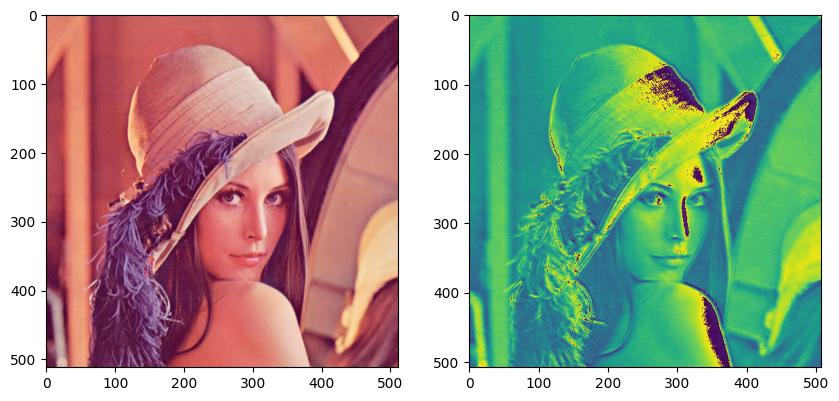

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(sample_image.astype('uint8'))
i = img_out[0].numpy().squeeze()
ax1.imshow(i.astype('uint8'));

**ToDo:** O que você observou nas imagens resultantes após a troca no conteúdo do *padding*?

```
Percebe-se uma mudança no padrão das cores da imagem assim como a aplicação dos filtros em partes mais próximas ao branco na imagem, como na parte frontal do chapeu, o nariz e no braço
```

## Inicializando os filtros manualmente (10pt)


A função abaixo inicializa um array de dimensões 5,5,3,3 com todas as posições zero, exceto as posições 5,5,0,0 , 5,5,1,1 e 5,5,2,2 que recebem o valor 1/25.

In [ ]:
def my_filter(shape=(5, 5, 3, 3), dtype=None):
    array = np.zeros(shape=shape, dtype=np.float32)
    array[:, :, 0, 0] = 1. / 25
    array[:, :, 1, 1] = 1. / 25
    array[:, :, 2, 2] = 1. / 25
    return array

A transposição pode ser usada para facilitar a visualização da matriz resultante.

In [ ]:
np.transpose(my_filter(), (2, 3, 0, 1))

array([[[[0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04]],

        [[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]]],


       [[[0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  ]],

        [[0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
         [0.04, 0.04, 0.04, 0.04, 0.04],
      

A função definida acima é usada para carregar valores nos filtros, e ela pode ser usada para pré-inicializar os filtros do objeto `conv3` o qual possui uma convolução 2D.

In [ ]:
conv3 = Sequential([
     Conv2D(filters=3, kernel_size=(5, 5), padding="same",
           input_shape=(None, None, 3), kernel_initializer=my_filter)
])
conv3.output_shape

(None, None, None, 3)

## Plote e observe o que aconte com a imagem (5pt)



Agora vamos testar o filtro criado na imagem de exemplo.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


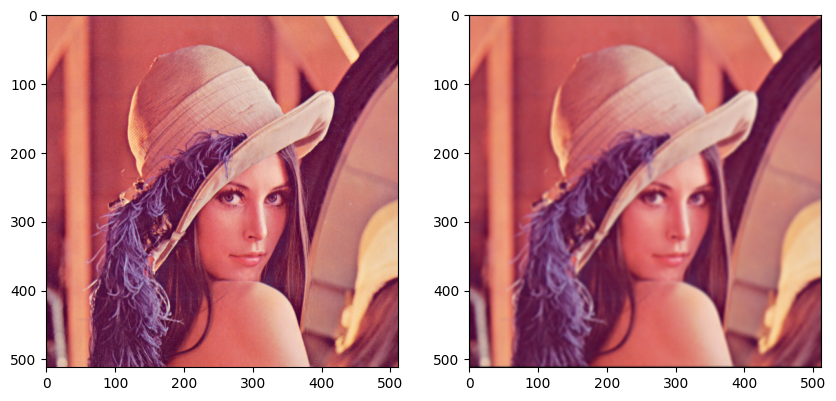

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(conv3.predict(img_in)[0].astype('uint8'));

**ToDo:** O que você observou após a aplicação do filtro criado manualmente na imagem original?

```
A imagem perdeu nitidez tendo uma adição de um borrão
```

## Criando um filtro de borda (5pt)

Crie uma nova função para gerar um filtro de borda nos 3 canais da imagem de entrada. O filtro deve ter o formato $3\times3$ e ter o formato $[[0, 0.2, 0], [0, -0.2, 0], [0, 0, 0]]$

In [ ]:
def my_new_filter(shape=(1, 3, 3, 3), dtype=None):
    my_filter = np.zeros(shape=shape, dtype=np.float32)
    my_filter[0][0][1] = 0.2
    my_filter[0][1][1] = -0.2
    return my_filter

In [ ]:
print(my_new_filter())

[[[[ 0.   0.   0. ]
   [ 0.2  0.2  0.2]
   [ 0.   0.   0. ]]

  [[ 0.   0.   0. ]
   [-0.2 -0.2 -0.2]
   [ 0.   0.   0. ]]

  [[ 0.   0.   0. ]
   [ 0.   0.   0. ]
   [ 0.   0.   0. ]]]]


Inicialize o objeto `conv4` com seu novo filtro e aplique na imagem de entrada

In [ ]:
conv4 = Sequential([
    Conv2D(filters=3, kernel_size=(5, 5), padding="same",
           input_shape=(None, None, 3), kernel_initializer=my_new_filter)
])
conv4.output_shape

(None, None, None, 3)

Agora vamos plotar a imagem resultante.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


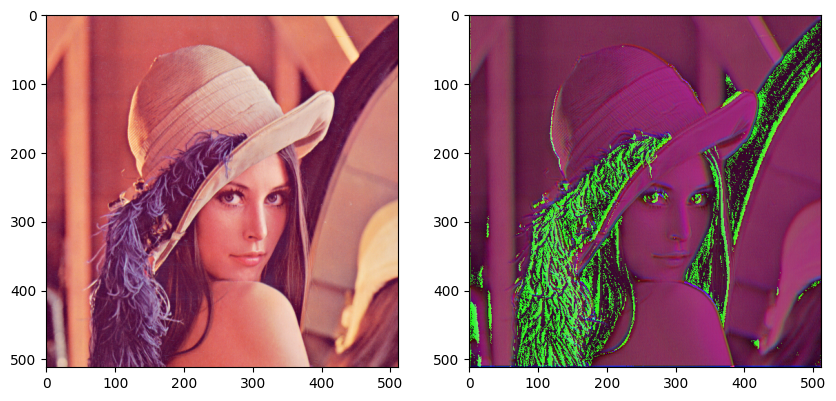

In [ ]:
# Plote as duas iamgens lado a lado (filtrada e não filtrada)
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 5))
ax0.imshow(img_in[0].astype('uint8'))
ax1.imshow(conv.predict(img_in)[0].astype('uint8'));

**ToDo:** O que você observou após a aplicação do filtro criado manualmente na imagem original?

```
O filtro criado manualmente parece focar mais nos traços do cabelo e no portal, sendo que ambos também possuem uma coloração semelhante
```

# Classificando imagens de gatos e cães (70pt)




Antes de qualquer coisa, primeiro é necessário carregar os dados.

## Carregando os dados de Gato e Não Gato (10pt)

Aqui você precisa carregar os dados e normalizá-los também. Nesta prática em específico, não é necessária a vetorização dos dados.

In [ ]:
import h5py

def load_data():
    train_dataset = h5py.File('/content/drive/MyDrive/Praticas redes neurais/Lab2/train_catvnoncat.h5', "r")
    train_X = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_Y = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/drive/MyDrive/Praticas redes neurais/Lab2/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_Y = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes


    return train_X, train_Y, test_x, test_Y

train_X, train_Y, test_X, test_Y = load_data()

Observe o formato dos dados:

In [ ]:
print(f'Shape dos dados de treino: {train_X.shape}') # ToDo: Mostrar o shape dos dados
print(f'Shape das labels de treino: {train_Y.shape}') # ToDo: Mostrar o shape dos dados

print(f'Shape dos dados de teste : {test_X.shape}') # ToDo: Mostrar o shape dos dados
print(f'Shape das labels de teste : {test_Y.shape}') # ToDo: Mostrar o shape dos dados

Shape dos dados de treino: (209, 64, 64, 3)
Shape das labels de treino: (209,)
Shape dos dados de teste : (50, 64, 64, 3)
Shape das labels de teste : (50,)


Dependendo da forma como você carregou os dados de rótulos, pode ser que ele tenha mais de uma dimensão. Se este for o seu caso, você pode usar a função `squeeze()` para o vetor de rótulos ficar somente com uma dimensão.

## Implementando a rede (20pt)

Implemente uma rede de convolução simples, contendo 3 camadas de convolução seguidas de duas camadas densas (totalemtne conectadas) no final e por fim uma camada com ativação `sigmoid` para a classificação com um neurônio. Escolha filtros de tamanhos variados: (3,3) ou (5,5). Para cada camada, crie de 8 a 64 filtros.

Na camada densa, use de 64 a 256 neurônios.

In [ ]:
# Implementa uma rede de convolução simples, chamada model

input_size = (train_X.shape[1], train_X.shape[2], 3)
n_classes = 1

model = models.Sequential()

model.add(layers.InputLayer(shape=(input_size)))

# ToDo : adicionar as outras camadas
model.add(Conv2D(filters=8, kernel_size=(5, 5), activation="relu", padding="valid"))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", padding="valid"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="valid"))


model.add(layers.Flatten()) # não esqueça da camada flatten ..

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))



Agora usaremos o comando `model.summary()` para conferir a arquitetura que você construiu.

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 60, 60, 8)           │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 58, 58, 32)          │           2,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │      51,380,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,418,433 (196.15 MB)

 Trainable params: 51,418,433 (196.15 MB)

 Non-trainable params: 0 (0.00 B)

## Preparando o modelo para treinamento (5pt)

Compile o modelo usando o método de otimização `adam` e função de custo (*loss*)`binary_categorical_crossentropy`.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ["accuracy"])

## Treinando o modelo (5pt)

Treine o modelo por 30 épocas com `batch_size` = 100.

In [ ]:
history = model.fit(x=train_X, y = train_Y, batch_size=100, epochs=30)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5018 - loss: 717.5364
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6590 - loss: 196.7712
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3983 - loss: 11.9207
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6403 - loss: 4.6185
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5097 - loss: 1.6533
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7975 - loss: 0.3473
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7020 - loss: 0.4513
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8140 - loss: 0.2937
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9877 - loss: 0.2045
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9939 - loss: 0.1981
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9964 - loss: 0.1382
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.09

O retorno da função `fit()` é um objeto para armazenar o histórico do treino.

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

Plote a acurácia e o custo (loss) do treino e da validação.

2/2 - 2s - 905ms/step - accuracy: 0.6400 - loss: 2.7502


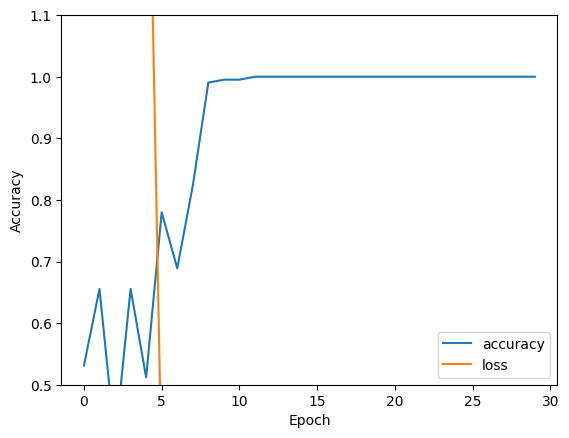

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

# ToDo: Coloque as suas variáveis de teste (x, y)
test_loss, test_acc = model.evaluate(test_X,  test_Y, verbose=2)

Verificando a acurácia obtida:

In [ ]:
print(test_acc)

0.6399999856948853


## Criando o seu próprio modelo (30pt)

O obejtivo é agora você testar o mesmo cenário, mas criando os seus próprios modelos. A sua tarefa é criar/testar dois modelos. Para isso, você está livre para testar o que quiser, desde a quantidade de camadas de convolução e densas, até as funções de *loss* e ativação. Inclusive, se quiser, pode utilizar camadas de *pooling*.

### Modelo 1 (10pt)

In [ ]:
from tensorflow.keras.layers import MaxPool2D, BatchNormalization, Dense, AveragePooling2D, Dropout

modelo1 = models.Sequential([
    layers.InputLayer(shape=(input_size)),
    Conv2D(filters=16, kernel_size=(3, 3), activation="relu", padding="same"),
    Dropout(0.2),
    MaxPool2D(),
    Conv2D(filters=16, kernel_size=(5, 5), activation="relu", padding="valid"),
    MaxPool2D(),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="valid"),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="valid"),
    MaxPool2D(),
    Conv2D(filters=8, kernel_size=(3, 3), padding="valid"),

    layers.Flatten(),

    Dense(256, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')

])
modelo1.summary()

modelo1.compile(optimizer='adamw', loss='binary_crossentropy', metrics = ["accuracy"])
modelo1.fit(x=train_X, y = train_Y, batch_size=100, epochs=30)
modelo1.evaluate(test_X, test_Y)

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_109 (Conv2D)                  │ (None, 64, 64, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 32, 32, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_110 (Conv2D)                  │ (None, 28, 28, 16)          │           6,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_111 (Conv2D)                  │ (None, 12, 12, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_112 (Conv2D)                  │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_113 (Conv2D)                  │ (None, 3, 3, 8)             │           4,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_27 (Flatten)                 │ (None, 72)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 256)                 │          18,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 70,841 (276.72 KB)

 Trainable params: 70,329 (274.72 KB)

 Non-trainable params: 512 (2.00 KB)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.5441 - loss: 0.7175
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6356 - loss: 0.6505 
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7056 - loss: 0.5557 
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6368 - loss: 0.6205 
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6623 - loss: 0.5775
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7175 - loss: 0.5189 
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7297 - loss: 0.4999 
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7260 - loss: 0.4817 
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7897 - loss: 0.4373 
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8094 - loss: 0.4226 
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8228 - loss: 0.4042 
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7950 - loss: 0.4070 
Epo

[0.8686403632164001, 0.7200000286102295]

### Modelo 2 (10pt)

In [ ]:
modelo2 = models.Sequential([
    layers.InputLayer(shape=(input_size)),
    Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding="same"),
    AveragePooling2D((2,2)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding="same"),
    AveragePooling2D((2,2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding="same"),
    MaxPool2D(),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding="valid"),


    layers.Flatten(),

    Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation = 'sigmoid')

])
modelo2.summary()

modelo2.compile(optimizer='adamw', loss='binary_crossentropy', metrics = ["accuracy"])
modelo2.fit(x=train_X, y = train_Y, batch_size=100, epochs=30)
modelo2.evaluate(test_X, test_Y)

Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_136 (Conv2D)                  │ (None, 64, 64, 8)           │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_10                 │ (None, 32, 32, 8)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_137 (Conv2D)                  │ (None, 32, 32, 32)          │           2,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_11                 │ (None, 16, 16, 32)          │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_138 (Conv2D)                  │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_139 (Conv2D)                  │ (None, 6, 6, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_34 (Flatten)                 │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_131 (Dense)                    │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_132 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_133 (Dense)                    │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_134 (Dense)                    │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 695,233 (2.65 MB)

 Trainable params: 695,233 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.4553 - loss: 5.8999
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6081 - loss: 3.6671 
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4482 - loss: 1.0288 
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6150 - loss: 0.7978 
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5914 - loss: 0.7054 
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4536 - loss: 0.7848 
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6600 - loss: 0.6271 
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6568 - loss: 0.6438 
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6649 - loss: 0.6074 
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6872 - loss: 0.5556 
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6919 - loss: 0.5523
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6700 - loss: 0.5539 
Epo

[0.6782644391059875, 0.7599999904632568]

### Avaliando o modelo que você criou (10pt)

O que você consegue analisar olhando os modelos que você criou e o modelo proposto? Essa análise pode envolver custo computacional, memória, etc.

```


Ambos os modelos apresentam resultados semelhantes de acurácia, sendo que o segundo obteve resultados melhores na loss para os dados de teste. Todavia o segundo modelo apresenta quase 10x mais parâmetros que o segundo, o que implica em um consumo maior de memória e processamento para treinamento e inferência. Por fim, vale ressaltar que, mesmo ambos os modelos possuindo overfitting, ele ainda é menor que o primeiro modelo treinado em aula, indicando uma melhor generalização dos dados.
```